Data Collection

In [114]:
import pandas as pd
import numpy as np
# import jax
# import jax.numpy as jnp
# from jax import jit
import matplotlib.pyplot as plt


In [115]:
fiveyr = pd.read_csv('data/T5YIE.csv')

In [116]:
fiveyr['DATE'] = pd.to_datetime(fiveyr['DATE'])
fiveyr['T5YIE'] = pd.to_numeric(fiveyr['T5YIE'], errors='coerce')
fiveyr['T5YIE'] = fiveyr['T5YIE'].dropna()
fiveyr['T5YIE'] = fiveyr['T5YIE'].astype(float)

In [117]:
#Measure probability changes in inflation over time, next quarter
#Find which equities do good in that circumstance
#revalue your portfolio by taking the best industries and shorting the worst


In [118]:
cpi = pd.read_csv("data/CPIAUCSL.csv")
#cpi = pd.read_csv("T5YIE.csv")
cpi.columns = ["date", 'CPI_Percent_Change']

In [120]:
cpi.head()

,date,CPI_Percent_Change
0,1947-02-01,0.65177
1,1947-03-01,1.75763
2,1947-04-01,0.00000
3,1947-05-01,-0.22727
4,1947-06-01,0.59226


In [121]:
#cpi[cpi["CPI_Percent_Change"].str.contains(".")]

Read up on Jax boys, its the future
https://theaisummer.com/jax/#:~:text=What%20is%20Jax%3F%20Jax%20is%20a%20Python%20library,and%20Deepmind%20teams.%20Source%3A%20JAX%20documentation%20Install%20JAX

## Inflation Hedging Portfolio
In this notebook we will attempt to build a portfolio that hedges against inflation. We will bring in US equities data, and alternative data to do this.

Alt data ideas:
- Consumer confience
- Market sentiment
- AGRICULTURE
- Fed data
- SEC data

## Short term goals
- Explore equity data and make plots related to inflation factors
- Explore alt data for inflation sentiment or any other factors we want to consider

## Long term goal
- Build a portfolio that does well in high inflation periods
- Build a portfolio that does well in low inflation periods
- Predict inflation to reweight the portfolio (We can probably check our Inflation sentiment with the next months CPI,core CPI, or whichever other inflation metric we want to use) (article on this https://www.twosigma.com/articles/forecasting-inflation-like-a-data-scientist-2021-edition/)


## CPI Data

In [122]:
import plotly.express as px
fig = px.line(cpi, x='date', y="CPI_Percent_Change")
fig.show()

In [123]:
stocks = pd.read_csv("stocks (3).csv")

C:\Users\prana\AppData\Local\Temp\ipykernel_6724\2720942527.py:1: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



# SIC Merge Calculation

In [124]:
sic = pd.read_csv('data/sic.csv')
sic.sort_values(by='SIC')
sic = sic[['SIC', 'Description']]
sic_2 = pd.read_csv('sic_2.csv')
sic_2 = sic_2[['SIC Code', 'Industry Title']]
sic_2.sort_values(by ='SIC Code')


result = pd.concat([sic, sic_2], ignore_index=True)

sic_codes = result['SIC Code'].tolist()
sic = result['SIC'].tolist()

sic = [sic_codes[i] if pd.isna(sic[i]) else sic[i] for i in range(len(sic))]

result['SIC Code'] = sic
result.drop('SIC', axis=1, inplace=True)
result.rename(columns={'SIC Code': 'SIC'}, inplace=True)

sic_merged_df = pd.merge(stocks, result, left_on ='SICCD', right_on = 'SIC')

sic_merged_df


,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut,Description,SIC,Industry Title
0,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,01/31/1986,4.375,0.707317,177082.0,3680.0,NaN,3990.0,MISCELLANEOUS MANUFACTURING INDUSTRIES
1,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,02/28/1986,3.25,-0.257143,82800.0,3680.0,NaN,3990.0,MISCELLANEOUS MANUFACTURING INDUSTRIES
2,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,03/31/1986,4.4375,0.365385,107801.0,3680.0,NaN,3990.0,MISCELLANEOUS MANUFACTURING INDUSTRIES
3,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,04/30/1986,4.0,-0.098592,95700.0,3793.0,NaN,3990.0,MISCELLANEOUS MANUFACTURING INDUSTRIES
4,10000,Q,OPTIMUM MANUFACTURING INC; COM A; CONS,OMFGA,3990,NOAVAIL,05/30/1986,3.1094,-0.222656,107362.0,3793.0,NaN,3990.0,MISCELLANEOUS MANUFACTURING INDUSTRIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5927824,93247,N,GRAHAM PACKAGING CO INC; COM NONE; CONS,GRM,3085,INDL,05/31/2011,22.69,-0.013478,5054400.0,65696.0,Plastics Bottles,3085.0,NaN
5927825,93247,N,GRAHAM PACKAGING CO INC; COM NONE; CONS,GRM,3085,INDL,06/30/2011,25.22,0.111503,50670600.0,66816.0,Plastics Bottles,3085.0,NaN
5927826,93247,N,GRAHAM PACKAGING CO INC; COM NONE; CONS,GRM,3085,INDL,07/29/2011,25.35,0.005155,8489600.0,67755.0,Plastics Bottles,3085.0,NaN
5927827,93247,N,GRAHAM PACKAGING CO INC; COM NONE; CONS,GRM,3085,INDL,08/31/2011,25.47,0.004734,11091800.0,67755.0,Plastics Bottles,3085.0,NaN


In [125]:
sic_merged_df['Industry Title'].value_counts()[sic_merged_df['Industry Title'].value_counts()>10000]

CRUDE PETROLEUM & NATURAL GAS                                90628
REAL ESTATE INVESTMENT TRUSTS                                78282
PHARMACEUTICAL PREPARATIONS                                  67048
SERVICES-PREPACKAGED SOFTWARE                                65517
SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING, ETC.         57092
ELECTRIC SERVICES                                            52289
STATE COMMERCIAL BANKS                                       46383
NATIONAL COMMERCIAL BANKS                                    39809
ELECTRONIC COMPONENTS & ACCESSORIES                          39582
SEMICONDUCTORS & RELATED DEVICES                             37607
INVESTORS, NEC                                               33637
RETAIL-EATING PLACES                                         31783
FIRE, MARINE & CASUALTY INSURANCE                            31247
TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE)                 30514
SERVICES-BUSINESS SERVICES, NEC                              2

In [126]:
# Group the dataframe by industry title
grouped = sic_merged_df.groupby('Industry Title')

# Filter out industry titles with less than 10,000 occurrences
sic_merged_df = grouped.filter(lambda x: len(x) >= 10000)

In [127]:
sic_merged_df

,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut,Description,SIC,Industry Title
15057,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,01/31/1986,4.75,0.225806,208921.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING..."
15058,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,02/28/1986,3.8125,-0.197368,199100.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING..."
15059,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,03/31/1986,4.75,0.245902,181477.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING..."
15060,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,04/30/1986,5.0,0.052632,220824.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING..."
15061,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,05/30/1986,6.625,0.325000,376148.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889063,93305,Q,FINANCIAL ENGINES INC; COM NONE; CONS,FNGN,6282,FINL,03/29/2018,35.0,0.047178,8444727.0,63492.0,NaN,6282.0,INVESTMENT ADVICE
4889065,93305,Q,FINANCIAL ENGINES INC; COM NONE; CONS,FNGN,6282,FINL,04/30/2018,44.65,0.275714,12420398.0,63550.0,NaN,6282.0,INVESTMENT ADVICE
4889067,93305,Q,FINANCIAL ENGINES INC; COM NONE; CONS,FNGN,6282,FINL,05/31/2018,44.65,0.000000,24066824.0,63550.0,NaN,6282.0,INVESTMENT ADVICE
4889069,93305,Q,FINANCIAL ENGINES INC; COM NONE; CONS,FNGN,6282,FINL,06/29/2018,44.9,0.007393,12727901.0,63717.0,NaN,6282.0,INVESTMENT ADVICE


In [128]:
temp = stocks['SecurityNm'].sample(n=1).values[0]
fig = px.line(x=stocks[stocks["SecurityNm"] == temp]["MthCalDt"], y=stocks[stocks["SecurityNm"] == temp]["MthRet"])
#44602
print(temp)
fig.show()

IOWA ILLINOIS GAS & ELEC CO; COM NONE; CONS


In [129]:
cpi.dtypes

date                   object
CPI_Percent_Change    float64
dtype: object

In [130]:
from datetime import timedelta

cpi["date"] = pd.to_datetime(cpi["date"]) - timedelta(days=1)
fiveyr["DATE"] = pd.to_datetime(fiveyr['DATE']) - timedelta(days=1)

In [131]:
sic_merged_df
stocks = sic_merged_df
fiveyr = fiveyr.rename(columns={'DATE': 'date'})


In [132]:
stocks["MthCalDt"] = pd.to_datetime(stocks["MthCalDt"])

In [133]:
fiveyr[fiveyr['date']=='2018-06-29']

,date,T5YIE


In [134]:
#T5YIE
#merged = pd.merge(stocks, fiveyr, how="left", left_on="MthCalDt", right_on="date")
#CPI
merged = pd.merge(stocks, cpi, how="left", left_on="MthCalDt", right_on="date")

In [135]:
merged

,PERMNO,PrimaryExch,SecurityNm,Ticker,SICCD,ICBIndustry,MthCalDt,MthPrc,MthRet,MthVol,ShrOut,Description,SIC,Industry Title,date,CPI_Percent_Change
0,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,1986-01-31,4.75,0.225806,208921.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",1986-01-31,-0.18198
1,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,1986-02-28,3.8125,-0.197368,199100.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",1986-02-28,-0.54695
2,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,1986-03-31,4.75,0.245902,181477.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",1986-03-31,-0.36664
3,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,1986-04-30,5.0,0.052632,220824.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",1986-04-30,0.27599
4,10007,Q,SHAREDATA INC; COM NONE; CONS,SHRD,7370,NOAVAIL,1986-05-30,6.625,0.325000,376148.0,12892.0,NaN,7370.0,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452633,93305,Q,FINANCIAL ENGINES INC; COM NONE; CONS,FNGN,6282,FINL,2018-03-29,35.0,0.047178,8444727.0,63492.0,NaN,6282.0,INVESTMENT ADVICE,NaT,NaN
1452634,93305,Q,FINANCIAL ENGINES INC; COM NONE; CONS,FNGN,6282,FINL,2018-04-30,44.65,0.275714,12420398.0,63550.0,NaN,6282.0,INVESTMENT ADVICE,2018-04-30,0.25305
1452635,93305,Q,FINANCIAL ENGINES INC; COM NONE; CONS,FNGN,6282,FINL,2018-05-31,44.65,0.000000,24066824.0,63550.0,NaN,6282.0,INVESTMENT ADVICE,2018-05-31,0.13518
1452636,93305,Q,FINANCIAL ENGINES INC; COM NONE; CONS,FNGN,6282,FINL,2018-06-29,44.9,0.007393,12727901.0,63717.0,NaN,6282.0,INVESTMENT ADVICE,NaT,NaN


In [136]:
Industry_group=merged.groupby("Industry Title").mean()["MthRet"]
px.bar(x=Industry_group.index, y=Industry_group.values)

In [137]:
#Remove this when you are not using T5YIE anymore
# merged = merged[merged['T5YIE'].notna()]
# merged

In [138]:
#thresholds = pd.qcut(merged[merged["T5YIE"]>=0]["T5YIE"], q=4).unique()
thresholds = pd.qcut(merged[merged["CPI_Percent_Change"]>=0]["CPI_Percent_Change"], q=3).unique()

In [139]:
fiveyr['T5YIE'].dropna().sort_values(ascending = False)

5016    3.59
5014    3.57
5015    3.57
5017    3.56
5006    3.52
        ... 
1536   -1.94
1537   -1.95
1538   -2.06
1539   -2.23
1541   -2.24
Name: T5YIE, Length: 5023, dtype: float64

In [140]:
thresholds

[(0.197, 0.383], (-0.001, 0.197], (0.383, 1.81]]
Categories (3, interval[float64, right]): [(-0.001, 0.197] < (0.197, 0.383] < (0.383, 1.81]]

In [141]:
#This can be used to calculate a change in inflation from the last month to this month
#merged["Inflation_Change"] = merged["CPI_Percent_Change"] - merged["CPI_Percent_Change"].shift(1)


In [142]:
merged["Inflation"] = pd.cut(merged["CPI_Percent_Change"],[-1, 0,.2,.4,5], labels=["deflation","low", "mid", "high"])

#merged["Inflation"] = pd.cut(merged["T5YIE"],[.559,1.62,1.96,2.34,3.28], labels=["deflation","low", "mid", "high"])

# merged["Inflation"] = pd.cut(merged["Inflation_Change"],
#                                             [-1, 0, .2, .4, 5], 
#                                              labels=["deflation", "low", "mid", "high"])


In [143]:
thresholds

[(0.197, 0.383], (-0.001, 0.197], (0.383, 1.81]]
Categories (3, interval[float64, right]): [(-0.001, 0.197] < (0.197, 0.383] < (0.383, 1.81]]

In [144]:
#merged[merged["Inflation"] == "deflation"]["Inflation"].hist()

In [145]:
merged["Inflation"].value_counts()

mid          316575
high         289214
low          281343
deflation    130033
Name: Inflation, dtype: int64

In [146]:
Industry_Inflation_group=merged.groupby(["Industry Title","Inflation"]).mean()["MthRet"]


In [147]:
a = pd.DataFrame(Industry_Inflation_group).reset_index()
best_deflation=a[a['Inflation'] == 'deflation'].sort_values(by='MthRet', ascending = False).head(10)
worst_deflation=a[a['Inflation'] == 'deflation'].sort_values(by='MthRet', ascending = True).head(10)

best_low=a[a['Inflation'] == 'low'].sort_values(by='MthRet', ascending = False).head(10)
worst_low=a[a['Inflation'] == 'low'].sort_values(by='MthRet', ascending = True).head(10)

best_mid = a[a['Inflation'] == 'mid'].sort_values(by='MthRet', ascending = False).head(10)
worst_mid=a[a['Inflation'] == 'mid'].sort_values(by='MthRet', ascending = True).head(10)

best_high = a[a['Inflation'] == 'high'].sort_values(by='MthRet', ascending = False).head(10)
worst_high=a[a['Inflation'] == 'high'].sort_values(by='MthRet', ascending = True).head(10)


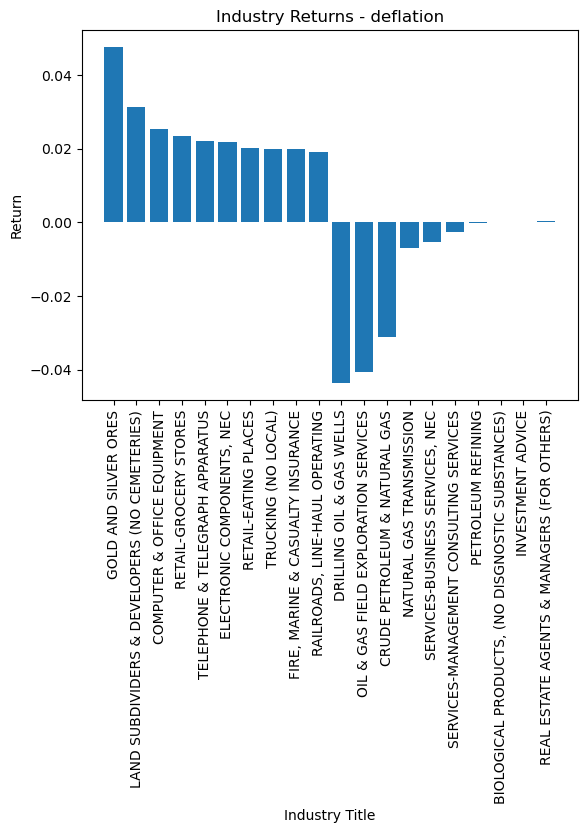

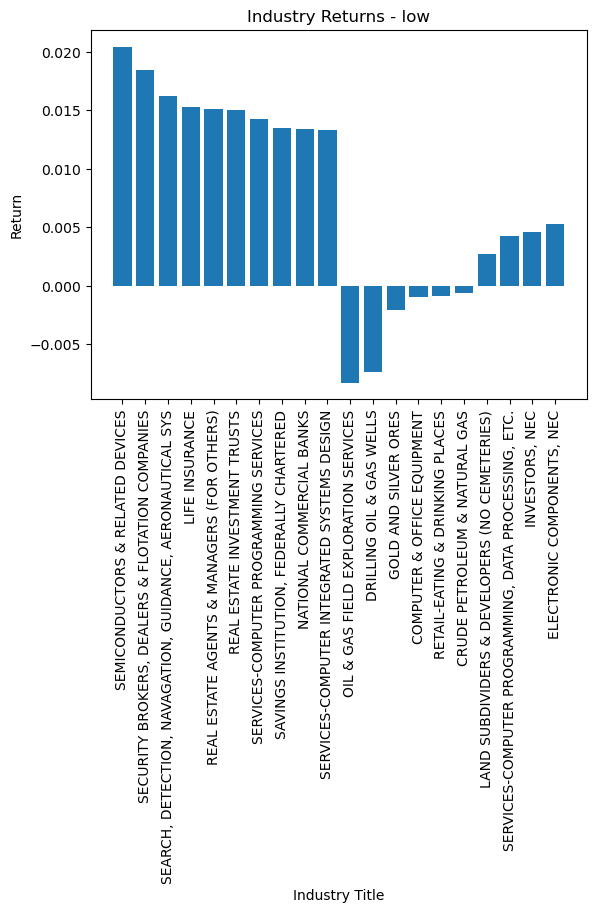

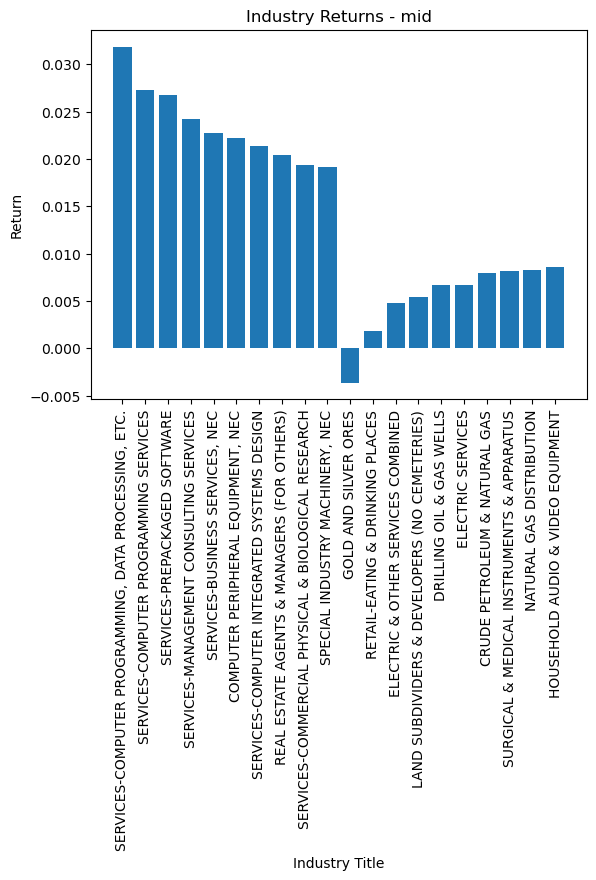

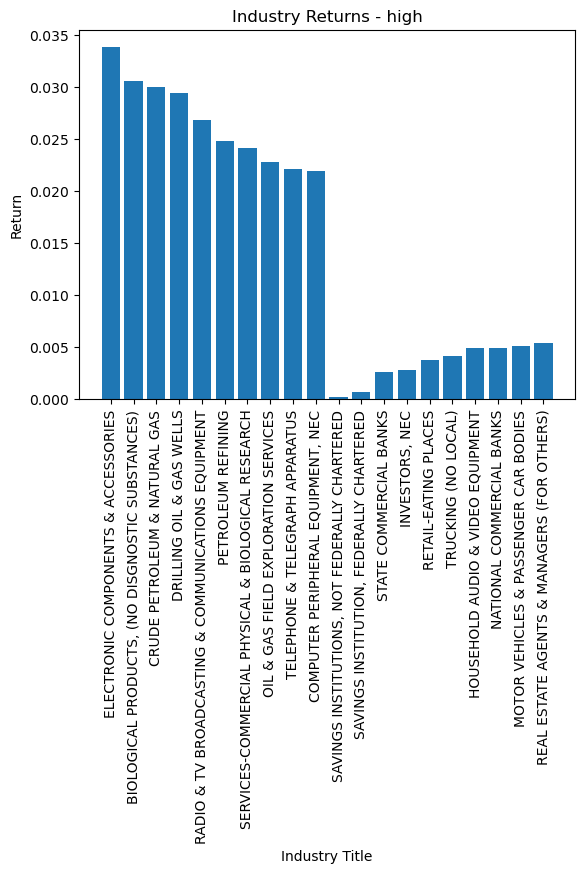

In [148]:
def visualize_industry_returns(df1,df2):
    df = pd.concat([df1,df2], axis = 0)
    fig, ax = plt.subplots()
    ax.bar(df['Industry Title'], df['MthRet'])
    plt.xlabel('Industry Title')
    plt.ylabel('Return')
    plt.xticks(rotation=90)
    plt.title('Industry Returns - '+ df['Inflation'].iloc[0])
    plt.show()
visualize_industry_returns(best_deflation,worst_deflation)
visualize_industry_returns(best_low,worst_low)
visualize_industry_returns(best_mid,worst_mid)
visualize_industry_returns(best_high,worst_high)




In [149]:
#plot a bar graph of the average returns for each industry and inflation level
import plotly.graph_objects as go
fig = go.Figure()
for i in Industry_Inflation_group.index.levels[0]:
    fig.add_trace(go.Bar(x=Industry_Inflation_group[i].index, y=Industry_Inflation_group[i].values, name=i))
fig.show()


In [111]:
merged.to_csv('merged.csv')

PORTFOLIO CONSTRUCTION FROM HERE

In [100]:
import pandas as pd
import numpy as np


# Group the data by Inflation and by date
a = merged.copy()
a = a[a['date']>'2012']
grouped = a.groupby(['Inflation', 'date'])
total_returns = []

# Iterate through the grouped data and select the top 10 and bottom 10 industries by return
for name, group in grouped:
    inflation, date = name
    sorted_group = group.sort_values("MthRet", ascending=False)
    top_10 = sorted_group.head(10)
    bottom_10 = sorted_group.tail(10)
    top_10_return = np.mean(top_10["MthRet"])
    bottom_10_return = np.mean(bottom_10["MthRet"])
    total_return = top_10_return - bottom_10_return
    total_returns.append(total_return)
    #Ignore this, this was just so I could check some of the stuff
    #print("Date: {}, Inflation: {}\nTop 10 Industries by Return: {}\nBottom 10 Industries by Return: {}\nTotal Return: {}\n".format(date, inflation, top_10_return, bottom_10_return, total_return))

total_returns = [x for x in total_returns if not np.isnan(x)]
average_total_return = np.mean(total_returns)

average_total_return



1.5118729190476188

In [101]:
import pandas as pd
import numpy as np


# Group the data by Inflation and by date
a = merged.copy()
a = a[a['date']>'1947']
grouped = a.groupby(['Inflation', 'date'])
total_returns = []

# Calculate the top 10 and bottom 10 industries for each inflation category over the entire duration
top_industries = {}
bottom_industries = {}
for inflation in a['Inflation'].unique():
    if pd.isna(inflation):
        continue
    inflation_group = a[a['Inflation']==inflation]
    sorted_group = inflation_group.sort_values("MthRet", ascending=False)
    top_10 = list(sorted_group.head(1000)['Industry Title'].unique())
    bottom_10 = list(sorted_group[sorted_group["MthRet"] < 0]['Industry Title'].unique()[:1000])
    top_industries[inflation] = top_10
    bottom_industries[inflation] = bottom_10

# Iterate through the grouped data and calculate the average return for each date
for name, group in grouped:
    date = name[1]
    inflation = group['Inflation'].iloc[0]
    if pd.isna(inflation):
        continue
    top_10_industries = top_industries[inflation]
    bottom_10_industries = bottom_industries[inflation]
    top_10 = group[group['Industry Title'].isin(top_10_industries)]
    bottom_10 = group[group['Industry Title'].isin(bottom_10_industries)]
    top_10_return = np.mean(top_10["MthRet"])
    bottom_10_return = np.mean(bottom_10["MthRet"])
    total_return = top_10_return - bottom_10_return
    total_returns.append(total_return)


total_returns = [x for x in total_returns if not np.isnan(x)]
average_total_return = np.mean(total_returns)

average_total_return


0.0001315082076721943

In [103]:
#You have to run this in collab
import pandas as pd
import numpy as np


def find_last_n_inflation_periods(inflation, date, n):
    """
    Finds the last n periods with the same inflation status as the current date.
    """
    a = merged.copy()
    a = a[a['date'] > '1947']
    a = a[a['Inflation'] == inflation]
    a = a[a['date'] < date]
    a = a.sort_values('date', ascending=False)
    last_n_periods = a['date'].iloc[:n].tolist()
    return last_n_periods


grouped = merged.groupby(['Inflation', 'date'])
total_returns = []

# Calculate the top 10 and bottom 10 industries for each date
for name, group in grouped:
    date = name[1]
    inflation = group['Inflation'].iloc[0]
    if pd.isna(inflation):
        continue
    last_n_periods = find_last_n_inflation_periods(inflation, date, 5)
    if not last_n_periods:
        continue
    inflation_group = merged[merged['date'].isin(last_n_periods) & (merged['Inflation'] == inflation)]
    sorted_group = inflation_group.sort_values("MthRet", ascending=False)
    top_10 = list(sorted_group.head(10)['Industry Title'].unique())
    bottom_10 = list(sorted_group[sorted_group["MthRet"] < 0]['Industry Title'].unique()[:10])
    top_10_industries = group[group['Industry Title'].isin(top_10)]
    bottom_10_industries = group[group['Industry Title'].isin(bottom_10)]
    top_10_return = np.mean(top_10_industries["MthRet"])
    bottom_10_return = np.mean(bottom_10_industries["MthRet"])
    total_return = top_10_return - bottom_10_return
    total_returns.append(total_return)

total_returns = [x for x in total_returns if not np.isnan(x)]
average_total_return = np.mean(total_returns)

average_total_return


KeyboardInterrupt: 

In [361]:
total_returns = [x for x in total_returns if not np.isnan(x)]


In [366]:
np.mean(total_returns)

0.002202447710998025

In [340]:
df = a.copy()
# First, we need to calculate the market capitalization of each company in the dataset
df['MthPrc'] = df['MthPrc'].str.replace(',','')
df['ShrOut'] = df['ShrOut'].astype(float)
df['MthPrc'] = df['MthPrc'].astype(float)
df['MarketCap'] = df['ShrOut'] * df['MthPrc']

# Next, we'll group the data by date and calculate the total market capitalization for each date
grouped = df.groupby('date')
total_market_cap = grouped['MarketCap'].sum()

# Now we'll calculate the market weight of each company on each date by dividing its market capitalization by the total market capitalization
df['MarketWeight'] = df.apply(lambda x: x['MarketCap']/total_market_cap[x['date']], axis=1)

# Finally, we'll multiply the return of each company by its market weight and sum up the results to get the market weighted value portfolio return for each date
df = df.dropna(subset=['MarketWeight', 'MthRet'])
df['MarketWeightedReturn'] = df['MarketWeight'] * df['MthRet']

market_weighted_return = df.groupby('date')['MarketWeightedReturn'].sum()

market_weighted_return.mean()


C:\Users\prana\AppData\Local\Temp\ipykernel_21912\3893374852.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.015863126089658244

0.015863126089658244

In [322]:
import pandas as pd

# Group the data by date and get the monthly return for each industry
grouped_by_date = a.groupby("MthCalDt")

# Create an empty list to store the monthly return for the top 10% of industries for each date
monthly_return_top_10_percent = []

# Iterate through each date group
for date, date_group in grouped_by_date:
    # Sort the date group by monthly return
    date_group_sorted = date_group.sort_values("MthRet", ascending=False)
    
    # Get the number of industries for this date group
    n = len(date_group_sorted)
    
    # Get the top 10% of industries
    top_10_percent = date_group_sorted.iloc[:int(n * 0.1)]
    
    # Calculate the average monthly return for the top 10% of industries
    avg_monthly_return = top_10_percent["MthRet"].mean()
    
    # Append the result to the list
    monthly_return_top_10_percent.append((date, avg_monthly_return))

# Convert the list to a dataframe
monthly_return_top_10_percent_df = pd.DataFrame(monthly_return_top_10_percent, columns=["MthCalDt", "Avg_Monthly_Return"])


In [324]:
monthly_return_top_10_percent_df['Avg_Monthly_Return'].mean()

0.2650357963888545

In [326]:
import pandas as pd


# Group the data by date and get the monthly return for each industry
grouped_by_date = a.groupby("MthCalDt")

# Create an empty list to store the weighted monthly return for the top 10% of industries for each date
monthly_return_top_10_percent_weighted = []

# Iterate through each date group
for date, date_group in grouped_by_date:
    # Sort the date group by monthly return
    date_group_sorted = date_group.sort_values("MthRet", ascending=False)
    
    # Get the number of industries for this date group
    n = len(date_group_sorted)
    
    # Get the top 10% of industries
    top_10_percent = date_group_sorted.iloc[:int(n * 0.1)]
    
    # Calculate the weighted monthly return for the top 10% of industries
    weighted_monthly_return = (top_10_percent["MthRet"] * top_10_percent["ShrOut"]).sum() / top_10_percent["ShrOut"].sum()
    
    # Append the result to the list
    monthly_return_top_10_percent_weighted.append((date, weighted_monthly_return))

# Convert the list to a dataframe
monthly_return_top_10_percent_weighted_df = pd.DataFrame(monthly_return_top_10_percent_weighted, columns=["MthCalDt", "Weighted_Avg_Monthly_Return"])


C:\Users\prana\AppData\Local\Temp\ipykernel_21912\3958277952.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Weighted_Avg_Monthly_Return    0.238527
dtype: float64

In [104]:
merged[merged['Inflation']=='high'][['MthRet','date']].mean()

C:\Users\prana\AppData\Local\Temp\ipykernel_6724\751453685.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



MthRet    0.013866
dtype: float64

In [105]:
Industry_Inflation_group

Industry Title                                    Inflation
BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)   deflation   -0.000049
                                                  low          0.005287
                                                  mid          0.017790
                                                  high         0.030621
BOTTLED & CANNED SOFT DRINKS & CARBONATED WATERS  deflation    0.012558
                                                                 ...   
TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE)      high         0.012059
TRUCKING (NO LOCAL)                               deflation    0.019999
                                                  low          0.008438
                                                  mid          0.014196
                                                  high         0.004208
Name: MthRet, Length: 232, dtype: float64